## K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("data.txt",delimiter=' ')
c1 = np.loadtxt("c1.txt",delimiter=' ')
c2 = np.loadtxt("c2.txt",delimiter=' ')

In [3]:
def L2(data,c):  # Euclidean distance  给定数据集和质心，返回更新后的簇和各点最近距离
    dist = np.zeros((data.shape[0],2))  #第一列存对应质心，第二列存最近距离
    for i in range(data.shape[0]):
        dist_temp=np.zeros(c.shape[0])  #Initialize the temp distance array
        for j in range(c.shape[0]):
            dist_temp[j] = np.sum((data[i,:]-c[j,:])**2)
        dist[i,0]=np.argmin(dist_temp)  #Get the min index
        dist[i,1]=np.min(dist_temp)  #Get the min distance as well as the cost function
    return dist

In [4]:
def L1(data,c):  # Manhattan distance  给定数据集和质心，返回更新后的簇和各点最近距离
    dist = np.zeros((data.shape[0],2))  #第一列存对应质心，第二列存最近距离
    for i in range(data.shape[0]):
        dist_temp=np.zeros(c.shape[0])  #Initialize the temp distance array
        for j in range(c.shape[0]):
            dist_temp[j] = np.sum(abs(data[i,:]-c[j,:]))
        dist[i,0]=np.argmin(dist_temp)  #Get the min index
        dist[i,1]=np.min(dist_temp)  #Get the min distance 
    return dist

In [5]:
def cost(dist):  #通过L1,L2函数给定dist计算成本函数
    return np.sum(dist[:,1])

In [6]:
def update(data,dist,k):  #根据dist更新聚类中心，k为聚类个数
    c=np.zeros((k,data.shape[1]))
    for i in range(k):
      c[i,:]=np.mean(data[np.where(dist[:, 0] == i)[0],:],axis=0)
    return c

In [7]:
def Kmeans(data,c,iteration,dis):  #data 为数据集，c为初始聚类中心，iteration为迭代次数，dis为距离函数
    cost_fun=np.zeros((iteration,1))
    k=10
    for i in range(iteration):
        dist=dis(data,c)
        c=update(data,dist,k)  #更新聚类中心
        cost_fun[i]=cost(dist)  #计算Cost Function
    return cost_fun

## K-Means算法迭代

In [8]:
c1_L2=Kmeans(data,c1,20,dis=L2)
print(f'c1_L2:\n{c1_L2}')
c2_L2=Kmeans(data,c2,20,dis=L2)
print(f'c2_L2:\n{c2_L2}')
c1_L1=Kmeans(data,c1,20,dis=L1)
print(f'c1_L1:\n{c1_L1}')
c2_L1=Kmeans(data,c2,20,dis=L1)
print(f'c2_L1:\n{c2_L1}')

c1_L2:
[[6.23660345e+08]
 [5.09862908e+08]
 [4.85480682e+08]
 [4.63997012e+08]
 [4.60969267e+08]
 [4.60537848e+08]
 [4.60313100e+08]
 [4.60003524e+08]
 [4.59570539e+08]
 [4.59021103e+08]
 [4.58490656e+08]
 [4.57944233e+08]
 [4.57558005e+08]
 [4.57290136e+08]
 [4.57050555e+08]
 [4.56892236e+08]
 [4.56703631e+08]
 [4.56404203e+08]
 [4.56177801e+08]
 [4.55986871e+08]]
c2_L2:
[[4.38747790e+08]
 [2.49803934e+08]
 [1.94494814e+08]
 [1.69804841e+08]
 [1.56295749e+08]
 [1.49094208e+08]
 [1.42508532e+08]
 [1.32303869e+08]
 [1.17170970e+08]
 [1.08547377e+08]
 [1.02237203e+08]
 [9.82780157e+07]
 [9.56302261e+07]
 [9.37933141e+07]
 [9.23771320e+07]
 [9.15416063e+07]
 [9.10455738e+07]
 [9.07522401e+07]
 [9.04701702e+07]
 [9.02164162e+07]]
c1_L1:
[[550117.142     ]
 [464829.26840395]
 [470934.15384668]
 [483874.81628509]
 [489234.23478835]
 [487664.69262679]
 [483718.66592851]
 [475337.94763306]
 [474871.96654966]
 [457244.78974175]
 [447493.19560405]
 [450891.83580477]
 [451232.5774757 ]
 [451860.1

#### (a) 2.作图

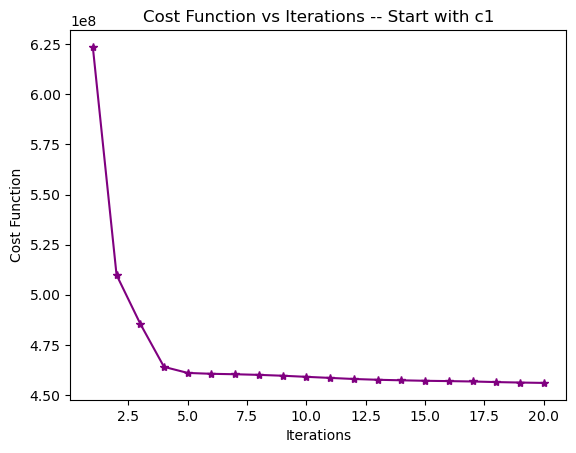

In [9]:
i=np.arange(1,21)
plt.plot(i,c1_L2,marker='*',color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations -- Start with c1')
plt.show()

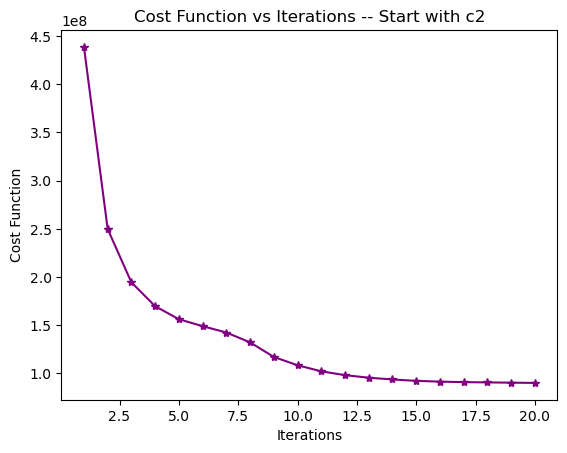

In [10]:
i=np.arange(1,21)
plt.plot(i,c2_L2,marker='*',color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations -- Start with c2')
plt.show()

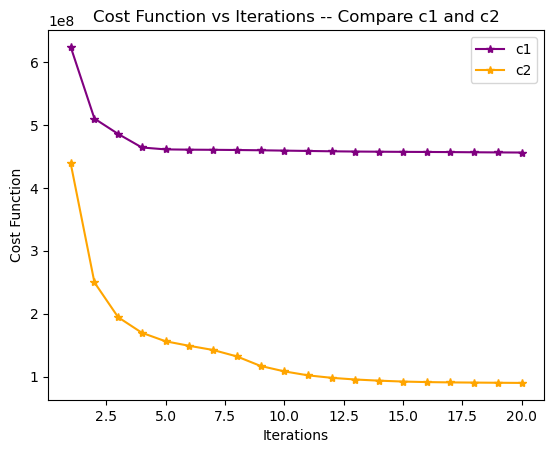

In [11]:
i=np.arange(1,21)
plt.plot(i,c1_L2,marker='*',color='purple')
plt.plot(i,c2_L2,marker='*',color='orange')
plt.legend(['c1','c2'])
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations -- Compare c1 and c2')
plt.show()

#### (a) 3.分析

In [12]:
print(f'c1在10次迭代后cost降低了{100*(c1_L2[0,0]-c1_L2[10,0])/c1_L2[0,0]}%')
print(f'c2在10次迭代后cost降低了{100*(c2_L2[0,0]-c2_L2[10,0])/c2_L2[0,0]}%')

c1在10次迭代后cost降低了26.483917144560543%
c2在10次迭代后cost降低了76.69795594605941%


c1在K-Means算法迭代了10次之后，成本函数下降约26.48%。  
c2在K-Means算法迭代了10次之后，成本函数下降约76.70%。  
通过比较两条Cost曲线，发现在相同迭代次数的而情况下，以c2作为初始点时的成本函数低于以c1作为初始点的成本函数。并且从最后的收敛结果来看，c2组的效果也更好。因此从总体来看，以c2作为初始点时，效果更好。这可能是因为c2的初始点之间距离较远，分布较为分散，有助于探索整个数据空间，不易收敛到局部最优解。

#### (b) 2.作图

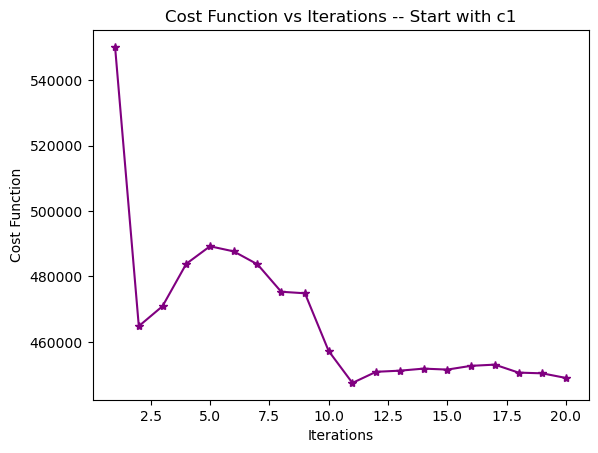

In [13]:
i=np.arange(1,21)
plt.plot(i,c1_L1,marker='*',color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations -- Start with c1')
plt.show()

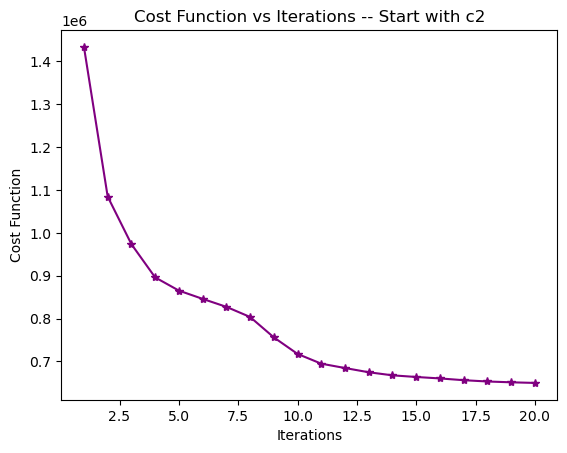

In [14]:
i=np.arange(1,21)
plt.plot(i,c2_L1,marker='*',color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations -- Start with c2')
plt.show()

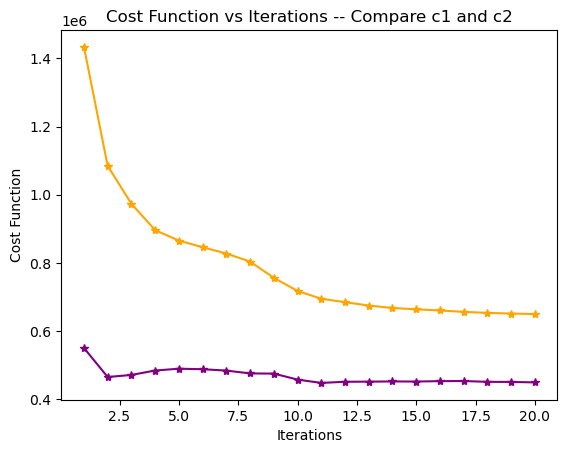

In [15]:
i=np.arange(1,21)
plt.plot(i,c1_L1,marker='*',color='purple')
plt.plot(i,c2_L1,marker='*',color='orange')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations -- Compare c1 and c2')
plt.show()

#### (b) 3.分析

In [16]:
print(f'c1在10次迭代后cost降低了{100*(c1_L1[0,0]-c1_L1[10,0])/c1_L1[0,0]}%')
print(f'c2在10次迭代后cost降低了{100*(c2_L1[0,0]-c2_L1[10,0])/c2_L1[0,0]}%')

c1在10次迭代后cost降低了18.654926116799246%
c2在10次迭代后cost降低了51.554099102389245%


c1在K-Means算法迭代了10次之后，成本函数下降约18.65%。  
c2在K-Means算法迭代了10次之后，成本函数下降约51.55%。  
通过比较两条Cost曲线，发现在相同迭代次数的而情况下，以c1作为初始点时的成本函数低于以c2作为初始点的成本函数。并且从最后的收敛结果来看，c1组的效果也更好。因此从总体来看，以c1作为初始点时，效果更好。这可能是因为c2的初始点落在了数据稀疏区或噪声区，导致c2的初始点并不能很好的反映出整体的数据结构。